## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on data science jobs posted on the website Glassdoor. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussion section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time.

### Data Science Job Salary Prediction
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Data of data science job posts from the website glassdoor are collected. This project aims to predict whether the salary is high or not. First, you will create a categorical variable `high_salary` based on the average salary `avg_salary`: if `avg_salary >= 150`, `high_salary = 1`; if `avg_salary < 150`, `high_salary = 0`. This new variable `high_salary` will be the prediction outcome `Y`. Of course: you cannot use other columns related to salary such as min, max, range of salary for prediction. Min, max, range of salary cannot be used as `X`. (This is cheating!)  <br>

#### Variables:
Described in the data description file.

### Module 1: Data Exploration
Load `jobs_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 400 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR. <br>
You don't have to remove outliers if there are not any. Provide justifications if you deem not necessary.

In [2]:
import pandas as pd

data = pd.read_csv('./jobs_train.csv')

# drop column 'Unnamed: 0'
data = data.drop('Unnamed: 0', axis=1)

# data cleansing
data = data[
    (data['Revenue'] != '-1') & 
    (data['Revenue'] != 'Unknown / Non-Applicable') & 
    (data['Sector'] != '-1') & 
    (data['Industry'] != '-1') &
    (data['company_age'] != -1)
] 

# reset index
data.reset_index(drop=True, inplace=True)

# The irrelavant / outlier records are dropped already. 
# It performs data cleansing by filtering out rows that contain certain invalid or missing values. 

In [19]:
senior_mapping = {
    "na": 0,
    "senior": 1
}

data['seniority'] = data['seniority'].map(senior_mapping)

# The original string values in the 'seniority' column are replaced with their 
# corresponding numerical representations based on the mapping defined in the senior_mapping dictionary.

In [4]:
revenue_mapping = {
    "Less than $1 million (USD)": 0,
    "$1 to $5 million (USD)": 1,
    "$5 to $10 million (USD)": 2,
    "$10 to $25 million (USD)": 3,
    "$25 to $50 million (USD)": 4,
    "$50 to $100 million (USD)": 5,
    "$100 to $500 million (USD)": 6,
    "$500 million to $1 billion (USD)": 7,
    "$1 to $2 billion (USD)": 8,
    "$2 to $5 billion (USD)": 9,
    "$5 to $10 billion (USD)": 10,
    "$10+ billion (USD)": 11
}

data['Revenue'] = data['Revenue'].map(revenue_mapping)

# The original string values in the 'Revenue' column are replaced with their 
# corresponding numerical representations based on the mapping defined in the revenue_mapping dictionary.

In [5]:
data['high_salary'] = data['avg_salary'].apply(lambda x: 1 if x >= 150 else 0)

# create "high_salary"column

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the high-salary group versus the low-salary group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important. For variables with similar patterns, you may state in your findings that variables a, b, c have similar patterns.

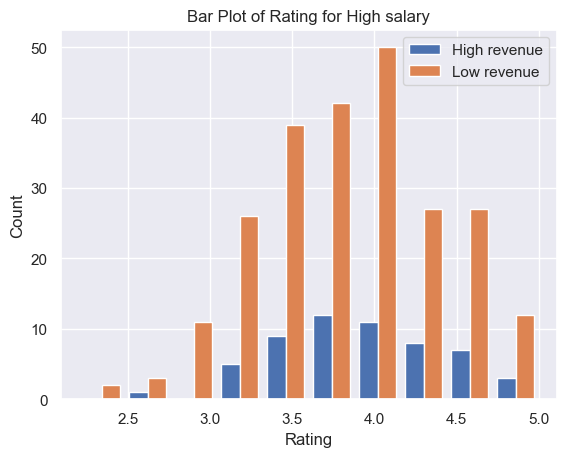

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of variables
high_salary = data[data['high_salary'] == 1]
low_salary = data[data['high_salary'] == 0]

high_revenue = high_salary['Rating']
low_revenue = low_salary['Rating']

plt.hist([high_revenue, low_revenue], label=['High revenue', 'Low revenue'])

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Bar Plot of Rating for High salary')

plt.legend()

plt.show()

# The graph is to find out the relationship between ratings and revenue. 
# It creates a histogram to visualize the distribution of ratings. 

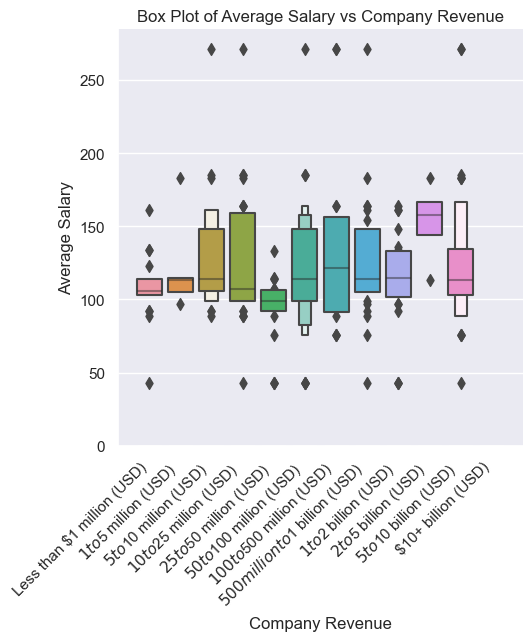

In [21]:
sns.catplot(
    data=data,
    x="Revenue", y="avg_salary", kind="boxen",
)

x_labels = list(revenue_mapping.keys())
x_ticks = list(revenue_mapping.values())
plt.bar(x_ticks, [0])
plt.xticks(x_ticks, x_labels, rotation=45, ha='right')

plt.xlabel('Company Revenue')
plt.ylabel('Average Salary')
plt.title('Box Plot of Average Salary vs Company Revenue')
plt.show()

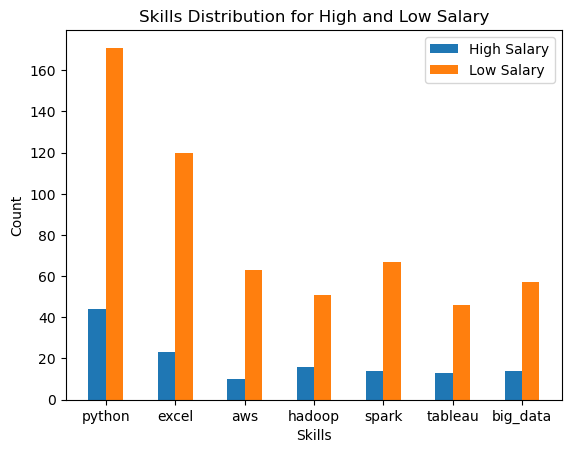

In [8]:
high_salary_data = data[data['high_salary'] == 1]
low_salary_data = data[data['high_salary'] == 0]

cat_vars = ['python', 'excel', 'aws', 'hadoop', 'spark', 'tableau', 'big_data']

# Get the counts of skills for high salary and low salary
high_salary_counts = high_salary_data[cat_vars].sum()
low_salary_counts = low_salary_data[cat_vars].sum()

columns = high_salary_counts.index

bar_width = 0.25
x_length = range(len(columns))
plt.bar(x_length, high_salary_counts, width=bar_width, label='High Salary')
plt.bar([x + bar_width for x in x_length], low_salary_counts, width=bar_width, label='Low Salary')

plt.xticks([x + bar_width/2 for x in x_length], columns)
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Skills Distribution for High and Low Salary')
plt.legend()
plt.show()



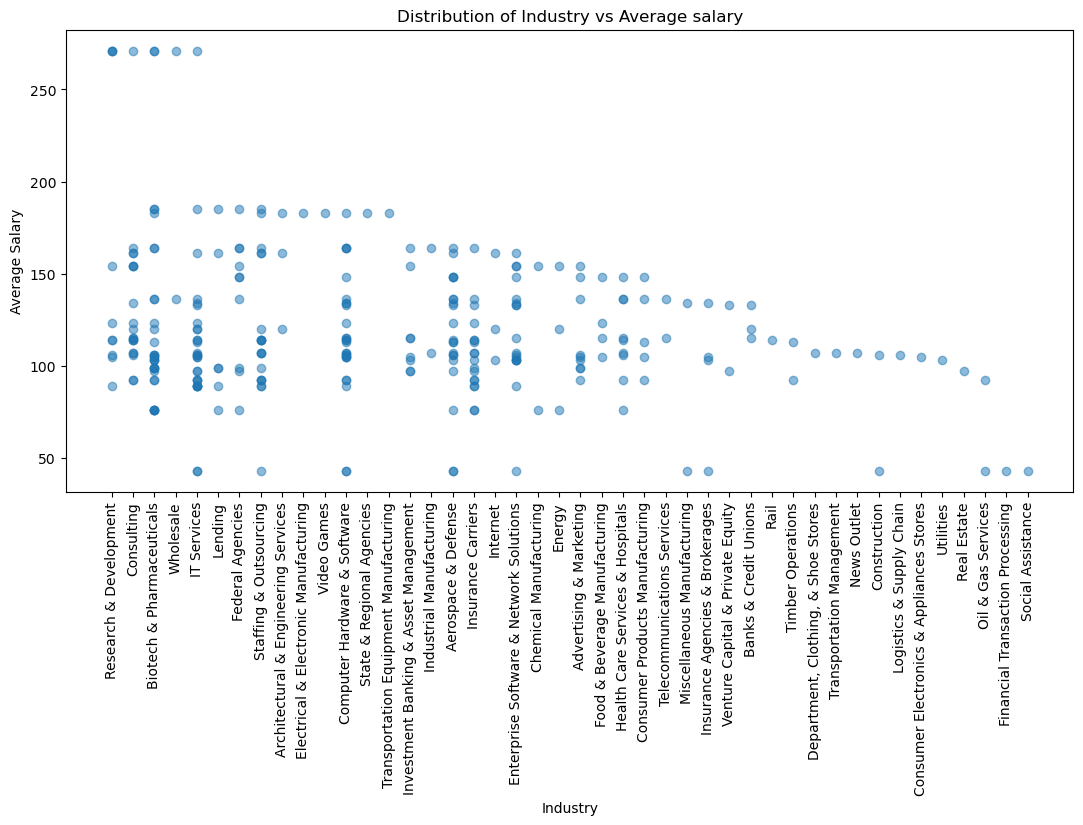

In [9]:
# Sort the data by average salary in descending order
sorted_data = data.sort_values(by='avg_salary', ascending=False)

industry = sorted_data['Industry']
sector = sorted_data['Sector']
avg_salary = sorted_data['avg_salary']


# Set the figure size
plt.figure(figsize=(13, 6))

plt.scatter(industry, avg_salary, alpha=0.5)

plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.title('Distribution of Industry vs Average salary')

plt.xticks(rotation=90)
plt.show()


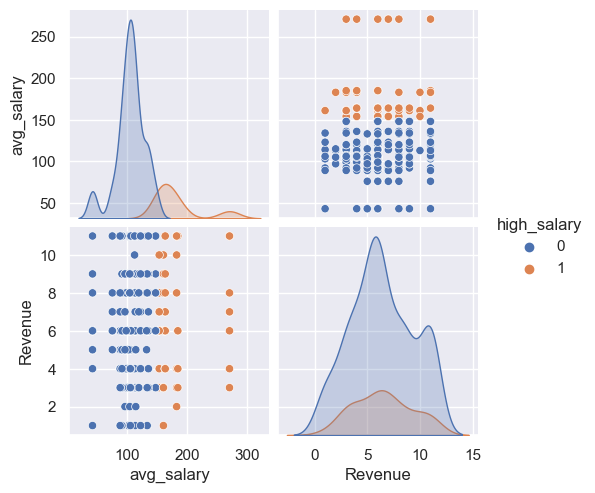

In [10]:
import seaborn as sns; 

industry_sector_salary = data[['Industry', 'Sector', 'high_salary', 'avg_salary', 'Revenue']]

sns.set()

sns.pairplot(industry_sector_salary, hue='high_salary');

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

/var/folders/12/1ng2stnd7yl2b1kvssq_v4mh0000gn/T/ipykernel_4426/3150136798.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['PC1'] = X_2D[:, 0]
/var/folders/12/1ng2stnd7yl2b1kvssq_v4mh0000gn/T/ipykernel_4426/3150136798.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['PC2'] = X_2D[:, 1]


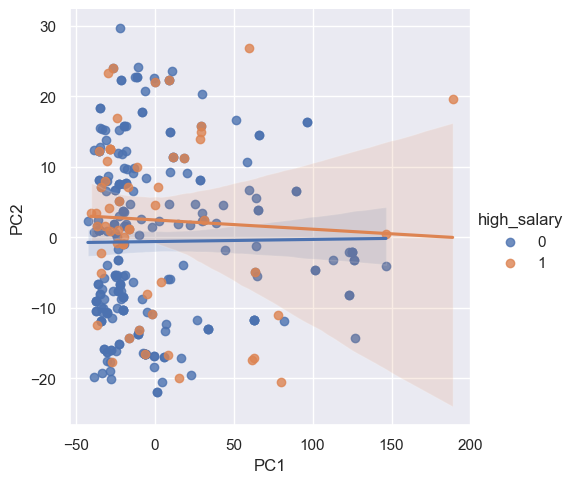

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Industry'] = label_encoder.fit_transform(data['Industry'])
data['Sector'] = label_encoder.fit_transform(data['Sector'])
data['job_state'] = label_encoder.fit_transform(data['job_state'])

num_cols = ['Rating', 'Revenue', 'company_age', 'seniority', 'Industry', 'Sector', 'job_state','python', 'excel', 'hadoop', 'aws', 'spark', 'tableau', 'big_data', 'high_salary']

num_data = data[num_cols]


model = PCA(n_components=2)

model.fit(num_data)

X_2D = model.transform(num_data)

num_data['PC1'] = X_2D[:, 0]
num_data['PC2'] = X_2D[:, 1]
sns.lmplot(x="PC1", y="PC2", hue='high_salary', data=num_data);

# PCA is used here to find out the most relevant component PC1 and PC2 among all the numerical features. 
# Some categorical features are encoded by label encoder.

### Module 4: Classification and Prediction
Choose three classification methods and build classification models based on data from `jobs_train.csv`, using five-fold cross-validation. <br>

Further, load `jobs_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the confusion matrix. Which observations have the worst prediction and what are their characteristics? <br>

Note: we don't deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.  

In [13]:
test = pd.read_csv('./jobs_test.csv')

num_test_cols = ['Rating', 'Revenue', 'company_age', 'seniority', 'Industry', 'Sector', 'job_state','python', 'excel', 'hadoop', 'aws', 'spark', 'tableau', 'big_data']

# handle test set
X_test = test[num_test_cols]

# data cleansing
X_test = X_test[
    (data['Revenue'] != '-1') & 
    (data['Revenue'] != 'Unknown / Non-Applicable') & 
    (data['Sector'] != '-1') & 
    (data['Industry'] != '-1') &
    (data['company_age'] != '-1')
] 

# reset index
data.reset_index(drop=True, inplace=True)

X_test['seniority'] = X_test['seniority'].map(senior_mapping)
X_test['Revenue'] = X_test['Revenue'].map(revenue_mapping)

X_test['Industry'] = label_encoder.fit_transform(X_test['Industry'])
X_test['Sector'] = label_encoder.fit_transform(X_test['Sector'])
X_test['job_state'] = label_encoder.fit_transform(X_test['job_state'])

X_test = X_test.fillna(-1)

# X_test is the predictors of the test data for doing the test data predictions
# By encoding and organising the columns, it matches the training set data structure to be apply in the models

/var/folders/12/1ng2stnd7yl2b1kvssq_v4mh0000gn/T/ipykernel_4426/2958592380.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test = X_test[


In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

LR_X = num_data.drop('high_salary', axis=1)
LR_X = LR_X.drop('PC1', axis=1)
LR_X = LR_X.drop('PC2', axis=1)

LR_y = num_data['high_salary']

LR_model = LogisticRegression()

LR_accurries = cross_val_score(LR_model, LR_X, LR_y, cv=5)

print('Accuracy:', LR_accurries.mean())

LR_model.fit(LR_X, LR_y)

LR_y_pred = LR_model.predict(X_test)
print(LR_y_pred)

Accuracy: 0.8067796610169491
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/alfred/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alfred/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

accurries = cross_val_score(rf, LR_X, LR_y, cv=5)

print('Accuracy:', accurries.mean())

rf.fit(LR_X, LR_y)

y_pred = rf.predict(X_test)
print(y_pred)

Accuracy: 0.7796610169491526
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

accurries = cross_val_score(svm, LR_X, LR_y, cv=5)

svm.fit(LR_X, LR_y)

print('Accuracy:', accurries.mean())

y_pred = svm.predict(X_test)
print(y_pred)

Accuracy: 0.8101694915254238
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Module 5: Summary
Summarize your findings and draw conclusions. Are there any interesting patterns that you would like to highlight?

### Conclusion
Since logistic regression is a linear model and may struggle to capture complex or nonlinear relationships in the data, the all-zero result could imply the data might not have a proper linear relationship or there is incorrect data preprocessing, such as mishandling missing values or improperly scaling features. This can indicate several potential issues, including data imbalance or inadequate model complexity.

Random forests, which can provide insights into feature importance, have improved the accuracy of the result. By considering a combination of decision trees and feature subsets, the model can identify the most significant features for making predictions. This can be particularly useful when dealing with datasets that have many features or when some features have a stronger impact on the target variable.

SVM models use different types of kernels to transform the data into higher-dimensional space. The model may not be able to effectively classify the features. SVM models are sensitive to the scale of the features. Therefore, if the features are not properly scaled, it affects the model's ability to find optimal results.